In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [3]:
print(data.head())

   id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1         28.0                   0   
1   2    Male   76                1          3.0                   0   
2   3    Male   47                1         28.0                   0   
3   4    Male   21                1         11.0                   1   
4   5  Female   29                1         41.0                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes         40454.0                  26.0      217   
1    1-2 Year             No         33536.0                  26.0      183   
2   > 2 Years            Yes         38294.0                  26.0       27   
3    < 1 Year             No         28619.0                 152.0      203   
4    < 1 Year             No         27496.0                 152.0       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0  


In [4]:
missing_values = data.isnull().sum()

# Impute missing numerical values with the median
data['Annual_Premium'].fillna(data['Annual_Premium'].median(), inplace=True)

# Impute missing categorical values with a special category
data['Vehicle_Age'].fillna("Unknown", inplace=True)

# Drop rows with missing values in other columns
data.dropna(subset=['Region_Code', 'Policy_Sales_Channel'], inplace=True)

In [5]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [6]:
data.drop_duplicates()

data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [7]:
data.replace(["?","n.a"],np.nan, inplace=True)

In [8]:
print(data.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


In [9]:
data['Vehicle_Age'] = data['Vehicle_Age'].str.replace(' Years', '')
data['Vehicle_Age'] = data['Vehicle_Age'].str.replace(' Year', '')

print(data)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [10]:
data['Vehicle_Age'] = data['Vehicle_Age'].replace({'> 2': 3, '< 1': 0.5})

print(data)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age Vehicle_

In [11]:
# Perform one-hot encoding using pandas' get_dummies function
data = pd.get_dummies(data, columns=['Vehicle_Damage'], drop_first=True)

print(data)

            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                   0   

       Vehicle_Age  Annual_

In [12]:
# Convert "Driving_License" and "Previously_Insured" columns to boolean
data['Driving_License'] = data['Driving_License'].astype(bool)
data['Previously_Insured'] = data['Previously_Insured'].astype(bool)

print(data)



            id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44             True         28.0               False   
1            2    Male   76             True          3.0               False   
2            3    Male   47             True         28.0               False   
3            4    Male   21             True         11.0                True   
4            5  Female   29             True         41.0                True   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74             True         26.0                True   
381105  381106    Male   30             True         37.0                True   
381106  381107    Male   21             True         30.0                True   
381107  381108  Female   68             True         14.0               False   
381108  381109    Male   46             True         29.0               False   

       Vehicle_Age  Annual_

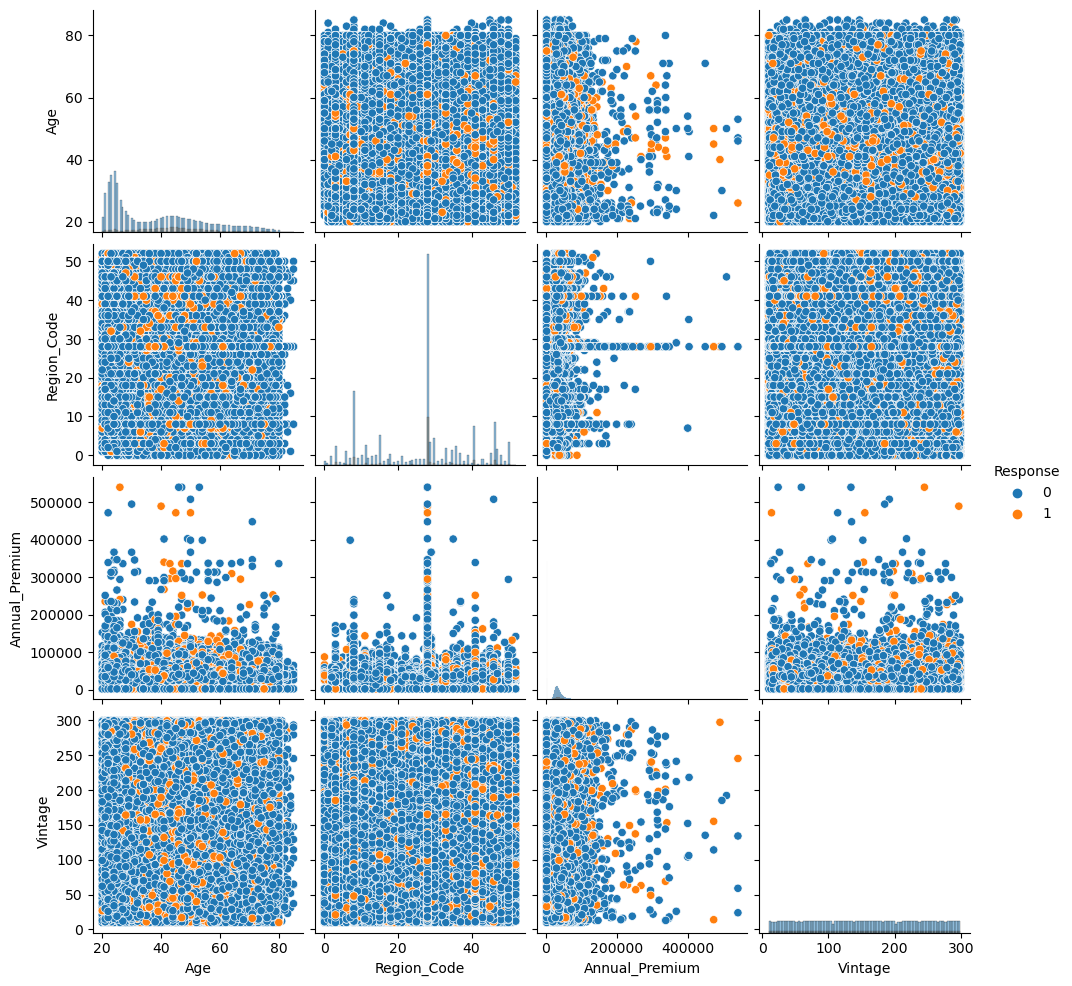

In [17]:
numerical_features = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']

# Create pair plot
sns.pairplot(data[numerical_features + ['Response']], hue='Response', diag_kind='hist')
plt.show()


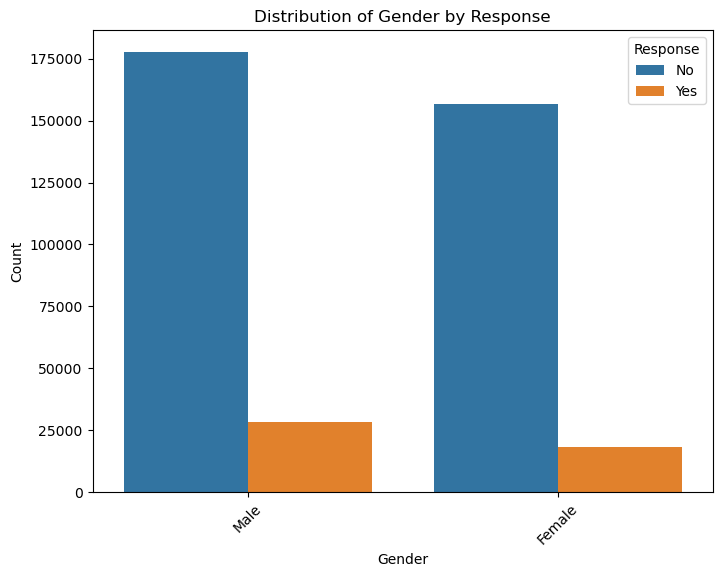

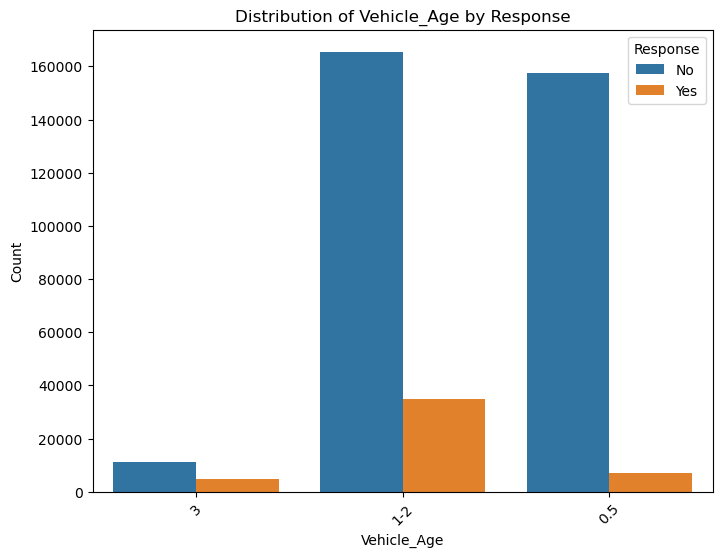

In [19]:
# Select categorical features
categorical_features = ['Gender', 'Vehicle_Age']

# Create bar plots for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=data[feature], hue='Response')
    plt.title(f'Distribution of {feature} by Response')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Response', labels=['No', 'Yes'])
    plt.show()

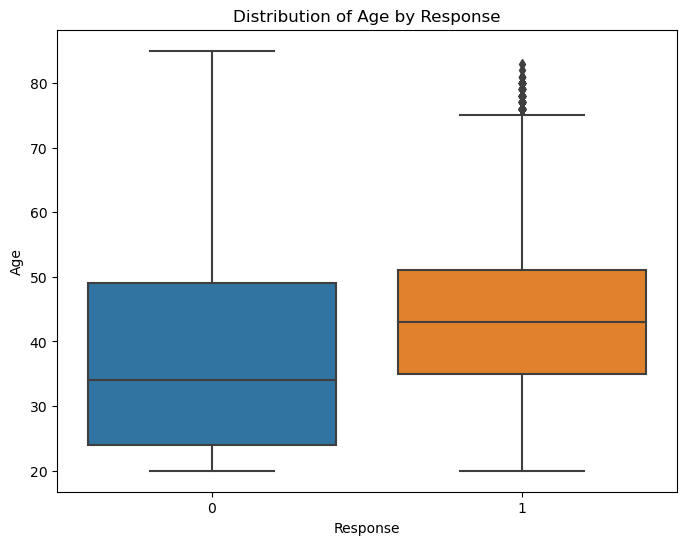

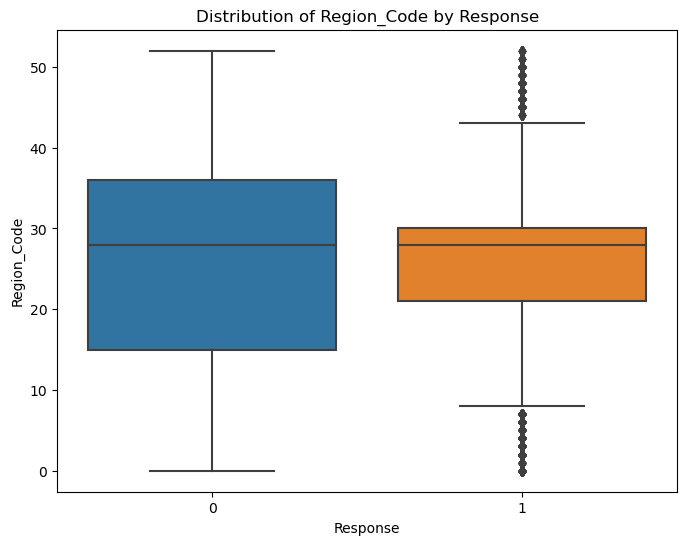

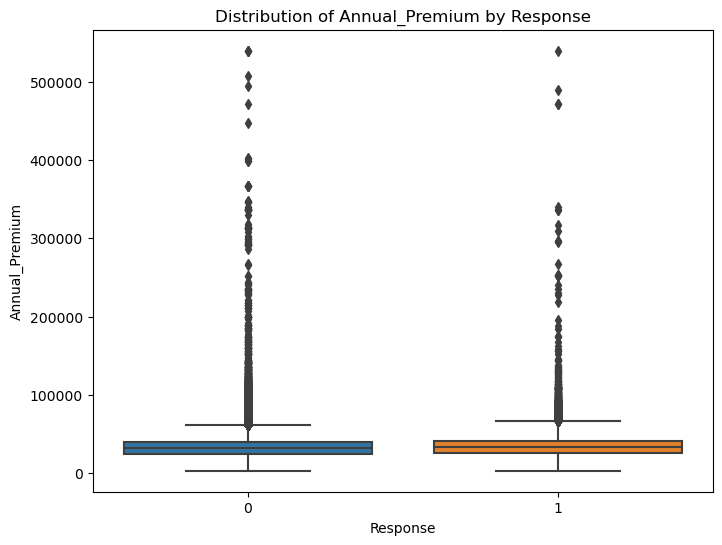

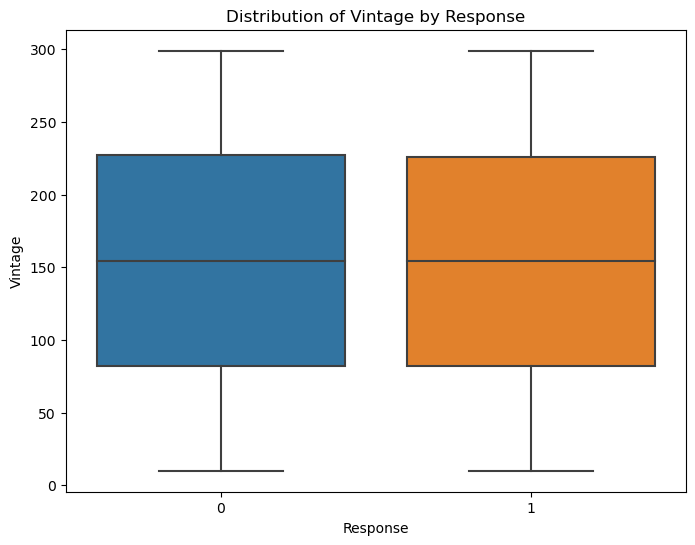

In [20]:
# Select numerical features
numerical_features = ['Age', 'Region_Code', 'Annual_Premium', 'Vintage']

# Create box plots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='Response', y=feature)
    plt.title(f'Distribution of {feature} by Response')
    plt.xlabel('Response')
    plt.ylabel(feature)
    plt.show()

In [ ]:
#Encodiing data

In [21]:
#to know the value counts as per gender
data["Gender"].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

In [22]:
#to know the value of people owns driving license
data["Driving_License"].value_counts()

True     380297
False       812
Name: Driving_License, dtype: int64

In [23]:
#encoding the categotical columns
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})


In [24]:
data


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Damage_Yes
0,1,0,44,True,28.0,False,3,40454.0,26.0,217,1,1
1,2,0,76,True,3.0,False,1-2,33536.0,26.0,183,0,0
2,3,0,47,True,28.0,False,3,38294.0,26.0,27,1,1
3,4,0,21,True,11.0,True,0.5,28619.0,152.0,203,0,0
4,5,1,29,True,41.0,True,0.5,27496.0,152.0,39,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,0,74,True,26.0,True,1-2,30170.0,26.0,88,0,0
381105,381106,0,30,True,37.0,True,0.5,40016.0,152.0,131,0,0
381106,381107,0,21,True,30.0,True,0.5,35118.0,160.0,161,0,0
381107,381108,1,68,True,14.0,False,3,44617.0,124.0,74,0,1


In [25]:
#seprating features and targets

In [26]:
# Separate features (X) and target (y)
X = data.drop(['Gender','Vehicle_Age','Annual_Premium'], axis=1)  # Features excluding 'Response'
y = data['Response']  # Target variable 'Response'

# Display the first few rows of features (X)
print(X.head())

# Display the first few rows of the target (y)
print(y.head())


   id  Age  Driving_License  Region_Code  Previously_Insured  \
0   1   44             True         28.0               False   
1   2   76             True          3.0               False   
2   3   47             True         28.0               False   
3   4   21             True         11.0                True   
4   5   29             True         41.0                True   

   Policy_Sales_Channel  Vintage  Response  Vehicle_Damage_Yes  
0                  26.0      217         1                   1  
1                  26.0      183         0                   0  
2                  26.0       27         1                   1  
3                 152.0      203         0                   0  
4                 152.0       39         0                   0  
0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64


In [27]:
y

0         1
1         0
2         1
3         0
4         0
         ..
381104    0
381105    0
381106    0
381107    0
381108    0
Name: Response, Length: 381109, dtype: int64

In [28]:
#splitting data into test data and train data

In [29]:
from sklearn.model_selection import train_test_split

# The test_size parameter determines the proportion of data that will be in the test set
# The random_state parameter is used for reproducibility, set it to a fixed value if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (304887, 9)
X_test shape: (76222, 9)
y_train shape: (304887,)
y_test shape: (76222,)


In [ ]:
#accuracy test

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8750623179659416
